# Python Tutorial 2

This will cover some more basics of python that may be useful over the summer. We will cover...

1. [Reading in files](#files) (text and root files)
2. [Dictionaries](#dict)
3. [Multiple plots](#plots) on one canvas
4. [Excercise](#ex)

<a id='files'></a>
## Reading in files

One great thing about python is how easy it is to read in text-type files (json, dat, etc.).

We are first going to go over how to read in a text file. I have created a text file in [jnb_files/data.txt](jnb_files/data.txt) which is a short report output from an analysis script.

In [1]:
# First we define a string with the location and name of the text file
textfile = "jnb_files/data.txt"

# Then we simply open the file
f = open(textfile)
print(f)

<_io.TextIOWrapper name='jnb_files/data.txt' mode='r' encoding='UTF-8'>


You see that when I print the file it is an object called \_io.TextIOWrapper\, but not the contents of the file. All we have to do is loop over the data and we can show what is in it.

In [2]:
# We loop over each line in the file
for line in f:
    # And simply print out each line to get the entire file
    print(line)
# Always make sure to close your file when you're done, don't waste CPU resources!    
f.close()    

Run #: 5151



**************************

* General Run Information

**************************

Beam energy : 10.596500

Target mass (amu) : 1.007940 



HMS Particle Mass : 0.000511

HMS P Central : 3.266000

HMS Angle : -12.530000



SHMS Particle Mass : 0.493677

SHMS P Central : 6.842000

SHMS Angle : 6.495000



SHMS Run Length   : 741.857

HMS  Run Length   : 741.857



********************

* DAQ Configuration

********************



Ps1_factor = 513

Ps2_factor = -1

Ps3_factor = -1

Ps4_factor = -1

Ps5_factor = -1



Run #: 5152



**************************

* General Run Information

**************************

Beam energy : 10.596500

Target mass (amu) : 1.007940 



HMS Particle Mass : 0.000511

HMS P Central : 3.266000

HMS Angle : -12.530000



SHMS Particle Mass : 0.493677

SHMS P Central : 6.842000

SHMS Angle : 6.495000



SHMS Run Length   : 772.054

HMS  Run Length   : 772.054



********************

* DAQ Configuration

********************



Ps1_factor = 513

Now let's say we want to store the SHMS and HMS data into arrays. It is very simple to do this!

In [3]:
f = open(textfile)

# Create lists to store the file data
shms_data = []
hms_data = []

for line in f:
    # Check if the string SHMS is in the line of the file
    if "SHMS" in line:
        # If it is then we add it to the list
        shms_data.append(line.split(':'))
    # Repeat for HMS    
    elif "HMS" in line:
        hms_data.append(line.split(':'))
    # If no SHMS or HMS in the line then let us know!
    else:
        # Here I did a little fancy pythonic maneuver to print the line in the print output, %s means it's a string!
        print("No (S)HMS data in line %s" % line) 
print("SHMS list:\n",shms_data) 
print("HMS list:\n",hms_data)        

No (S)HMS data in line Run #: 5151

No (S)HMS data in line 

No (S)HMS data in line **************************

No (S)HMS data in line * General Run Information

No (S)HMS data in line **************************

No (S)HMS data in line Beam energy : 10.596500

No (S)HMS data in line Target mass (amu) : 1.007940 

No (S)HMS data in line 

No (S)HMS data in line 

No (S)HMS data in line 

No (S)HMS data in line 

No (S)HMS data in line ********************

No (S)HMS data in line * DAQ Configuration

No (S)HMS data in line ********************

No (S)HMS data in line 

No (S)HMS data in line Ps1_factor = 513

No (S)HMS data in line Ps2_factor = -1

No (S)HMS data in line Ps3_factor = -1

No (S)HMS data in line Ps4_factor = -1

No (S)HMS data in line Ps5_factor = -1

No (S)HMS data in line 

No (S)HMS data in line Run #: 5152

No (S)HMS data in line 

No (S)HMS data in line **************************

No (S)HMS data in line * General Run Information

No (S)HMS data in line ***************

This data is not very nice to look at and if you want to play around with the data it can be rather cumbersome. Let's use something called a dictionary to make our lives easier!

<a id='dict'></a>
## Dictionaries

A dictionary is very similar to an array or list, but it is highly flexible pythonic object. Dictionaries have two important terms... <br>
* keys <br>
> Think of this as the "word" being defined by the dictionary
* items <br>
> This is then the definition of the key

The general format for dictionaries is... <br>
> dict = {
    "key" : definition
  }

You can call the definition of a key simply with... <br>
> dict[key] = definition

There are many ways to convert a list to a dictionary. I will outline just one way for now.

In [4]:
# Below we see another way to do comments
'''
We must first convert our elements to tuples. The reason for this is because lists are mutable 
which means they can be modified while tuples cannot. When a tuple is made, it stays that way. 
This is required for dictionaries so that we are not overwriting dictionary definitions
'''
shms_tuple = []
hms_tuple = []
for shms in shms_data:
    shms_tuple.append(tuple(shms))
for hms in hms_data:
    hms_tuple.append(tuple(hms))    
    
print("SHMS tuple:\n",list(shms_tuple)) 
print("HMS tuple:\n",list(hms_tuple))  
print("\n\n")

# Then we create our two dictionaries for the hms and shms
shms_dict = {}
hms_dict = {}

# Then things get a little tricky. We must convert our list of tuples to a dictionary
# We first loop over the both dimensions of the tuple
for (key, value) in shms_tuple:
    # The .rstrip(" ") function removes the space from the end of the key
    key = key.rstrip(" ")
    # Our case is even more tricky since we have duplicate key names. 
    # We must check if a key already exists in the dictionary first.
    if key in shms_dict:
        # If it does then we append that key to make a list of values
        # You will also notice I did some more fancy work with the value,
        # The .rstrip("\n") function removes the \n from the string value
        # and the float() function converts the string to a number
        shms_dict[key].append(float(value.rstrip("\n")))
    else:
        # If that key doesn't exist then we simply set that key equal to that value, 
        # but we must denote that as a list so we can append values later
        shms_dict[key] = [float(value.rstrip("\n"))]
print("SHMS dictionary:\n", shms_dict)
# Same procedure for the hms
for (key, value) in hms_tuple:
    key = key.rstrip(" ")
    if key in hms_dict:
        hms_dict[key].append(float(value.rstrip("\n")))
    else:
        hms_dict[key] = [float(value.rstrip("\n"))]
print("HMS dictionary:\n", hms_dict)

SHMS tuple:
 [('SHMS Particle Mass ', ' 0.493677\n'), ('SHMS P Central ', ' 6.842000\n'), ('SHMS Angle ', ' 6.495000\n'), ('SHMS Run Length   ', ' 741.857\n'), ('SHMS Particle Mass ', ' 0.493677\n'), ('SHMS P Central ', ' 6.842000\n'), ('SHMS Angle ', ' 6.495000\n'), ('SHMS Run Length   ', ' 772.054\n'), ('SHMS Particle Mass ', ' 0.493677\n'), ('SHMS P Central ', ' 6.842000\n'), ('SHMS Angle ', ' 6.495000\n'), ('SHMS Run Length   ', ' 746.880\n'), ('SHMS Particle Mass ', ' 0.493677\n'), ('SHMS P Central ', ' 6.842000\n'), ('SHMS Angle ', ' 6.495000\n'), ('SHMS Run Length   ', ' 798.599\n')]
HMS tuple:
 [('HMS Particle Mass ', ' 0.000511\n'), ('HMS P Central ', ' 3.266000\n'), ('HMS Angle ', ' -12.530000\n'), ('HMS  Run Length   ', ' 741.857\n'), ('HMS Particle Mass ', ' 0.000511\n'), ('HMS P Central ', ' 3.266000\n'), ('HMS Angle ', ' -12.530000\n'), ('HMS  Run Length   ', ' 772.054\n'), ('HMS Particle Mass ', ' 0.000511\n'), ('HMS P Central ', ' 3.266000\n'), ('HMS Angle ', ' -12.5300

<a id='plots'></a>
## Multiple plots on one canvas

Now that we have our dictionary all figured out, let's see if we can make some plots!

Text(0.5, 1.0, 'SHMS Run Length')

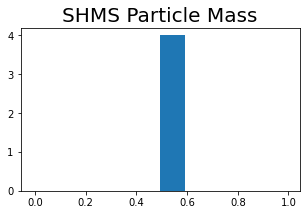

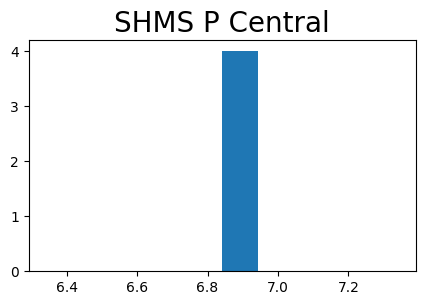

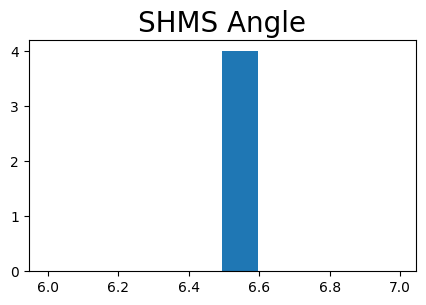

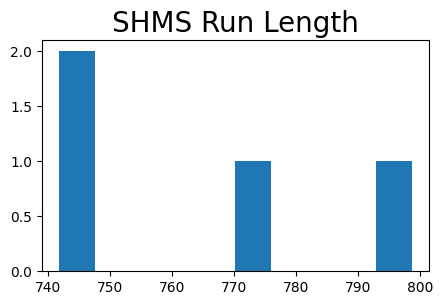

In [5]:
# We are going to make some histograms for the SHMS
import matplotlib.pyplot as plt

# We will define a size of the plot
f = plt.figure(figsize=(5.0,3.0))
# We will then define a style, look up more if you want to get fancy
plt.style.use('default')
plt.hist(shms_dict["SHMS Particle Mass"])
plt.title('SHMS Particle Mass', fontsize =20)

f = plt.figure(figsize=(5.0,3.0))
plt.style.use('default')
plt.hist(shms_dict["SHMS P Central"])
plt.title('SHMS P Central', fontsize =20)

f = plt.figure(figsize=(5.0,3.0))
plt.style.use('default')
plt.hist(shms_dict["SHMS Angle"])
plt.title('SHMS Angle', fontsize =20)

f = plt.figure(figsize=(5.0,3.0))
plt.style.use('default')
plt.hist(shms_dict["SHMS Run Length"])
plt.title('SHMS Run Length', fontsize =20)

Now that we have all our data in plots, it is sometimes good to see everything in one canvas. Let's see how we can do that!

Text(0.5, 1.0, 'SHMS Run Length')

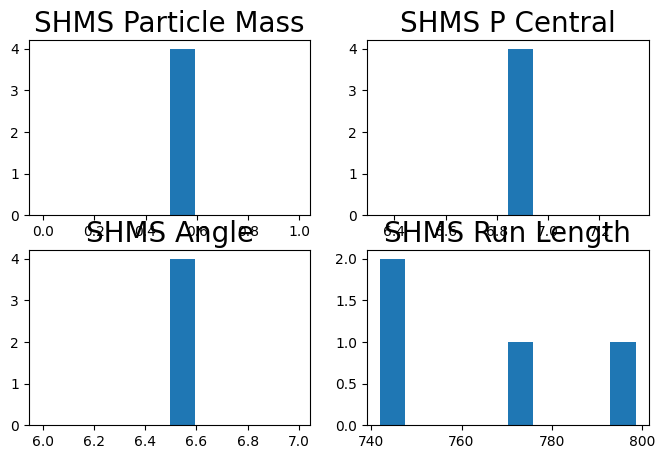

In [6]:
# We still define a size of the plot
f = plt.figure(figsize=(8.0,5.0))
# And a style
plt.style.use('default')

# But now we are going to also define axes for our canvas
# We use the add_subplot() function to separate the canvas
# We have 4 histograms so 221 in the function means this is the first of our 2 by 2 plots
ax = f.add_subplot(221)
plt.hist(shms_dict["SHMS Particle Mass"])
plt.title('SHMS Particle Mass', fontsize =20)

# Second plot so we change 1->2
ax = f.add_subplot(222)
plt.hist(shms_dict["SHMS P Central"])
plt.title('SHMS P Central', fontsize =20)

# And so on...
ax = f.add_subplot(223)
plt.hist(shms_dict["SHMS Angle"])
plt.title('SHMS Angle', fontsize =20)

ax = f.add_subplot(224)
plt.hist(shms_dict["SHMS Run Length"])
plt.title('SHMS Run Length', fontsize =20)

We see some overlaping in the plots so we just play around with figsize to see one we like.

Text(0.5, 1.0, 'SHMS Run Length')

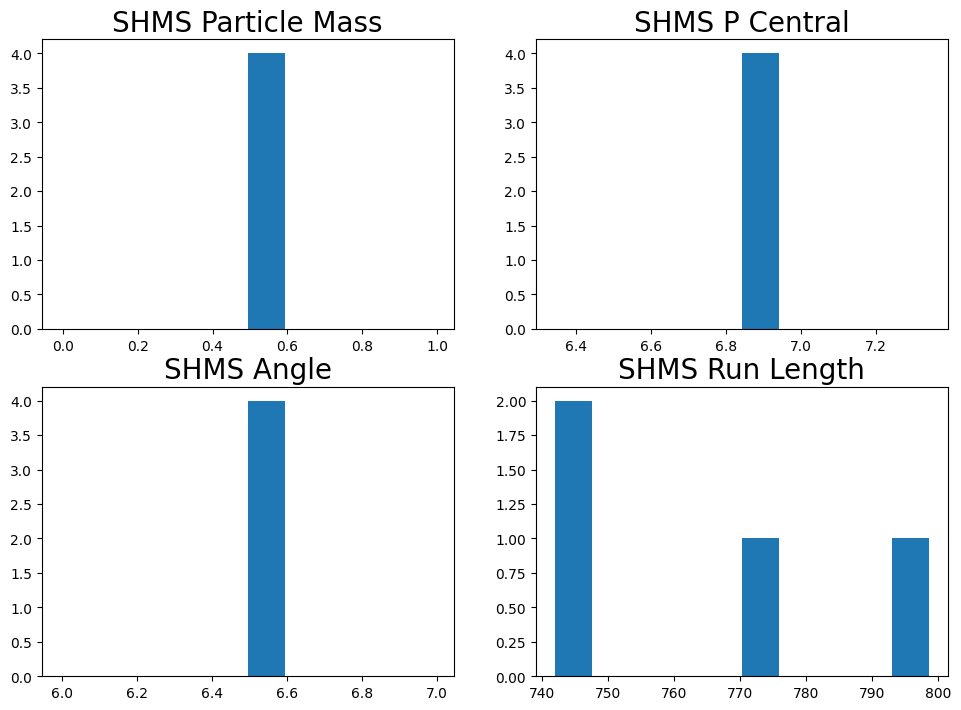

In [7]:
# Let's try this incredibly specific number to see if it works
f = plt.figure(figsize=(11.69,8.27))
plt.style.use('default')

ax = f.add_subplot(221)
plt.hist(shms_dict["SHMS Particle Mass"])
plt.title('SHMS Particle Mass', fontsize =20)

ax = f.add_subplot(222)
plt.hist(shms_dict["SHMS P Central"])
plt.title('SHMS P Central', fontsize =20)

ax = f.add_subplot(223)
plt.hist(shms_dict["SHMS Angle"])
plt.title('SHMS Angle', fontsize =20)

ax = f.add_subplot(224)
plt.hist(shms_dict["SHMS Run Length"])
plt.title('SHMS Run Length', fontsize =20)

<a id='files'></a>
## Excercise 2

No excercise besides trying this out with the projects you're already working on! 